# **Analyzing Price Trends and Predicting Economic Index Movements using Machine Learning**

In [35]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_original = pd.read_csv("cpi_india.csv")
df_original.head(6)

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
5,Rural+Urban,2013,February,110.4,110.2,112.8,104.9,105.5,103.6,103.2,...,100.4,106.0,105.2,104.5,104.2,103.6,103.9,104.5,104.4,105.3


In [3]:
## removing the Rural+Urban from Sector in order to avoid redundancy
## df_cpi = having (Rural and Urban)
df_cpi = df_original[df_original['Sector'] != 'Rural+Urban']
df_cpi.head(6)

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
6,Rural,2013,March,110.2,108.8,109.9,105.6,106.2,105.7,101.4,...,NaN,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0
7,Urban,2013,March,113.9,111.4,113.2,104.3,102.7,104.9,103.8,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0


In [4]:
df_cpi.info() # to understand the data stored here

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 0 to 397
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               266 non-null    object 
 1   Year                                 266 non-null    int64  
 2   Month                                266 non-null    object 
 3   Cereals and products                 264 non-null    float64
 4   Meat and fish                        262 non-null    float64
 5   Egg                                  264 non-null    float64
 6   Milk and products                    264 non-null    float64
 7   Oils and fats                        264 non-null    float64
 8   Fruits                               264 non-null    float64
 9   Vegetables                           264 non-null    float64
 10  Pulses and products                  264 non-null    float64
 11  Sugar and Confectionery              

## **Data Cleaning**

In [5]:
# changing the datatype of Housing column
df_cpi['Housing'] = pd.to_numeric(df_cpi['Housing'], errors='coerce')
df_cpi.head(),df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 0 to 397
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               266 non-null    object 
 1   Year                                 266 non-null    int64  
 2   Month                                266 non-null    object 
 3   Cereals and products                 264 non-null    float64
 4   Meat and fish                        262 non-null    float64
 5   Egg                                  264 non-null    float64
 6   Milk and products                    264 non-null    float64
 7   Oils and fats                        264 non-null    float64
 8   Fruits                               264 non-null    float64
 9   Vegetables                           264 non-null    float64
 10  Pulses and products                  264 non-null    float64
 11  Sugar and Confectionery              

<ipython-input-5-cafcb5a6f561>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi['Housing'] = pd.to_numeric(df_cpi['Housing'], errors='coerce')


(  Sector  Year     Month  Cereals and products  Meat and fish    Egg  \
 0  Rural  2013   January                 107.5          106.3  108.1   
 1  Urban  2013   January                 110.5          109.1  113.0   
 3  Rural  2013  February                 109.2          108.7  110.2   
 4  Urban  2013  February                 112.9          112.9  116.9   
 6  Rural  2013     March                 110.2          108.8  109.9   
 
    Milk and products  Oils and fats  Fruits  Vegetables  ...  Housing  \
 0              104.9          106.1   103.9       101.9  ...      NaN   
 1              103.6          103.4   102.3       102.9  ...    100.3   
 3              105.4          106.7   104.0       102.4  ...      NaN   
 4              104.0          103.5   103.1       104.9  ...    100.4   
 6              105.6          106.2   105.7       101.4  ...      NaN   
 
    Fuel and light  Household goods and services  Health  \
 0           105.5                         104.8   104

In [6]:
# handling the missing values
# using Linear Interpolation to fill the missing values

df_cleaned = df_cpi.interpolate(method='linear')
df_cleaned = df_cleaned.fillna(method='bfill') # to handle the missing values in the first row
df_cleaned.head(6)


<ipython-input-6-d65bc7d25734>:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_cleaned = df_cpi.interpolate(method='linear')
<ipython-input-6-d65bc7d25734>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method='bfill') # to handle the missing values in the first row


,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,100.30,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.30,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,100.35,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.40,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
6,Rural,2013,March,110.2,108.8,109.9,105.6,106.2,105.7,101.4,...,100.40,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0
7,Urban,2013,March,113.9,111.4,113.2,104.3,102.7,104.9,103.8,...,100.40,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0


In [7]:
# checking for duplicate values
duplicates = df_cleaned.duplicated(subset=['Year','Month','Sector']).sum()
duplicates

0

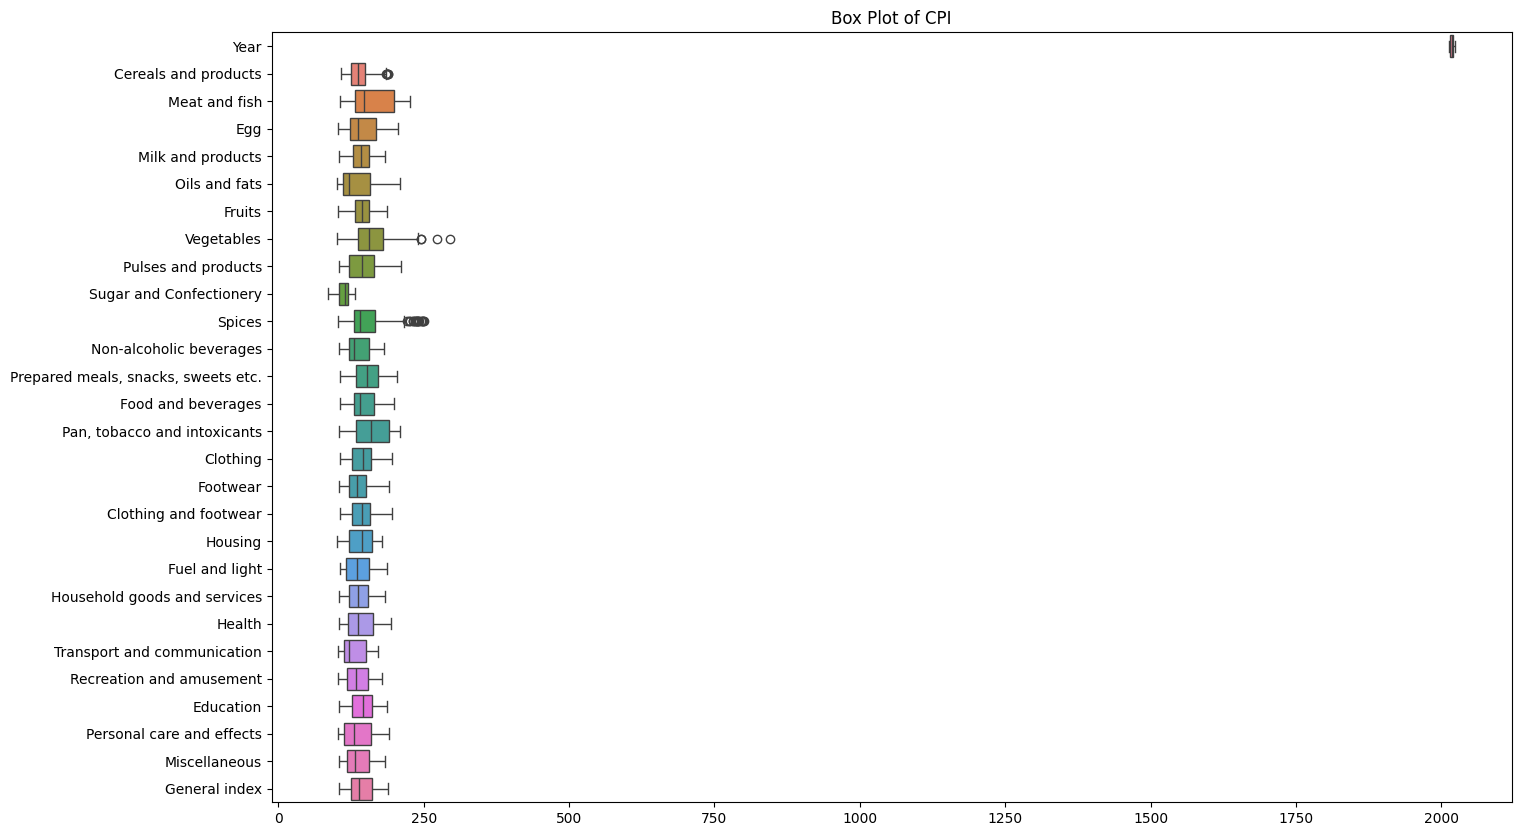

In [8]:
# check for outliers
plt.figure(figsize=(16,10))
sns.boxplot(data=df_cleaned, orient='h')
plt.title('Box Plot of CPI')
plt.show()

In [9]:
# removing the outliers
df_cleaned = df_cleaned.drop(['Cereals and products', 'Vegetables', 'Spices'], axis=1)
df_cleaned = df_cleaned.drop(['Clothing','Footwear'],axis=1) # as  we have already have column name "Clothing and footwear"
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 0 to 397
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               266 non-null    object 
 1   Year                                 266 non-null    int64  
 2   Month                                266 non-null    object 
 3   Meat and fish                        266 non-null    float64
 4   Egg                                  266 non-null    float64
 5   Milk and products                    266 non-null    float64
 6   Oils and fats                        266 non-null    float64
 7   Fruits                               266 non-null    float64
 8   Pulses and products                  266 non-null    float64
 9   Sugar and Confectionery              266 non-null    float64
 10  Non-alcoholic beverages              266 non-null    float64
 11  Prepared meals, snacks, sweets etc.  

## **Exploratory Data Analysis (EDA)**

In [10]:
df_cleaned.describe()

,Year,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Pulses and products,Sugar and Confectionery,Non-alcoholic beverages,"Prepared meals, snacks, sweets etc.",...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,2018.082707,160.871805,144.270677,143.205639,133.693609,143.303008,145.330075,112.115789,136.696992,152.525564,...,141.764662,139.244737,139.490226,141.753383,129.966917,136.869549,144.243233,137.176316,137.336842,142.767669
std,3.239019,35.663529,25.182521,20.552970,29.675039,19.156462,27.449918,9.863607,21.447879,25.259280,...,22.470301,24.482083,21.251994,26.084429,20.999583,21.892145,22.988004,25.984147,22.881709,22.670392
min,2013.000000,106.300000,102.700000,103.600000,101.100000,102.300000,103.500000,85.300000,104.800000,106.700000,...,100.300000,105.400000,104.800000,104.000000,103.200000,102.900000,103.500000,102.100000,103.700000,104.000000
25%,2015.000000,131.350000,123.325000,128.725000,111.000000,131.125000,120.750000,104.100000,120.625000,132.950000,...,122.100000,116.250000,121.925000,119.550000,112.350000,118.200000,125.900000,113.350000,117.225000,124.200000
50%,2018.000000,147.700000,137.600000,141.700000,121.200000,143.200000,143.800000,113.950000,130.250000,152.700000,...,143.400000,134.500000,137.550000,136.750000,121.100000,133.200000,145.150000,130.400000,132.350000,138.950000
75%,2021.000000,198.025000,168.525000,156.075000,157.975000,155.700000,165.275000,120.150000,155.250000,171.075000,...,161.037500,156.075000,153.775000,162.800000,150.350000,154.800000,161.875000,159.000000,156.000000,160.625000
max,2024.000000,226.600000,206.100000,183.200000,209.900000,186.700000,210.100000,131.400000,182.300000,204.000000,...,178.500000,187.400000,183.300000,193.800000,172.200000,177.400000,186.000000,190.100000,183.800000,188.200000


### **Scatter Plot**

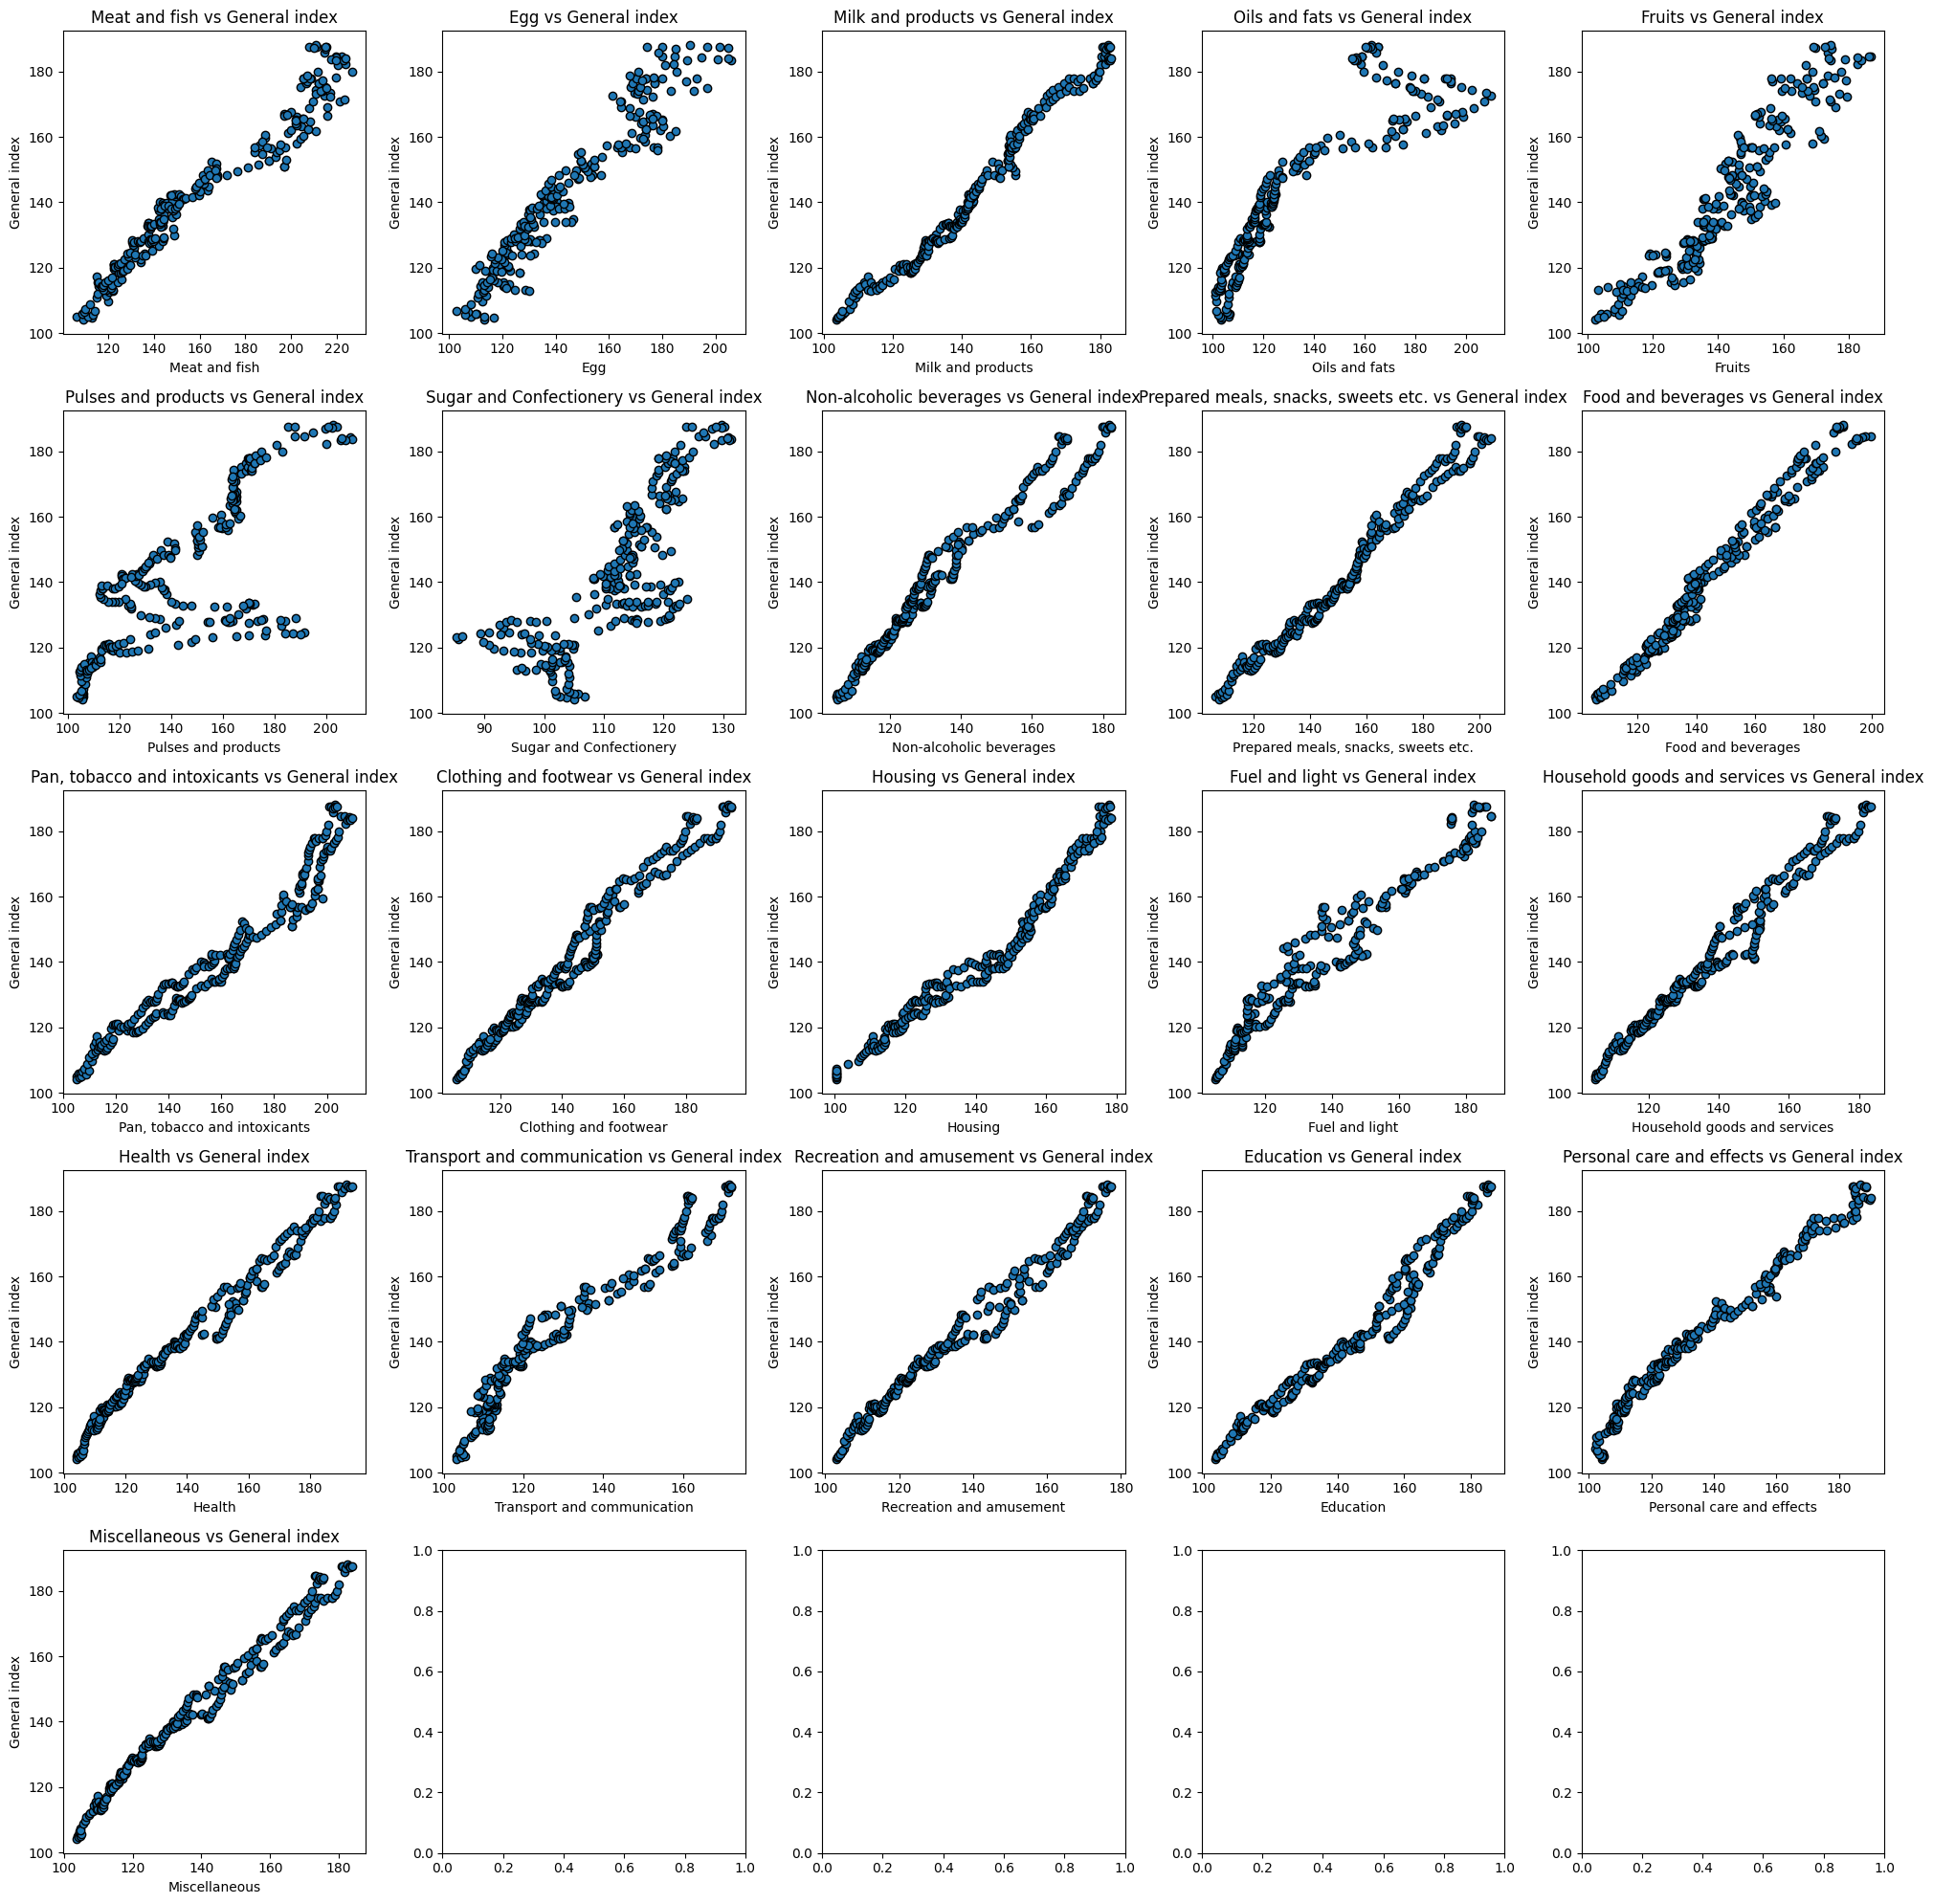

In [11]:
num_col = df_cleaned.select_dtypes(include=np.number) # to filter out only the columns that contain numerical data types

num_col = num_col.drop(['Year','General index'],axis=1)
fig,axes = plt.subplots(5,5,figsize=(20,20))
axes = axes.flatten()

for i, col in enumerate(num_col):
  axes[i].scatter(df_cleaned[col],df_cleaned['General index'],edgecolor='black')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('General index')
  axes[i].set_title(f'{col} vs General index')
plt.tight_layout()
plt.show()

## **General Index** =  represents the overall price level of a basket of goods and services, reflecting the average change in prices over time.

# **Trend Analysis**
## 👉 Yearly Trends visualization of the general index (for both rural and urban) as it is the calculated value of overall features  or categories

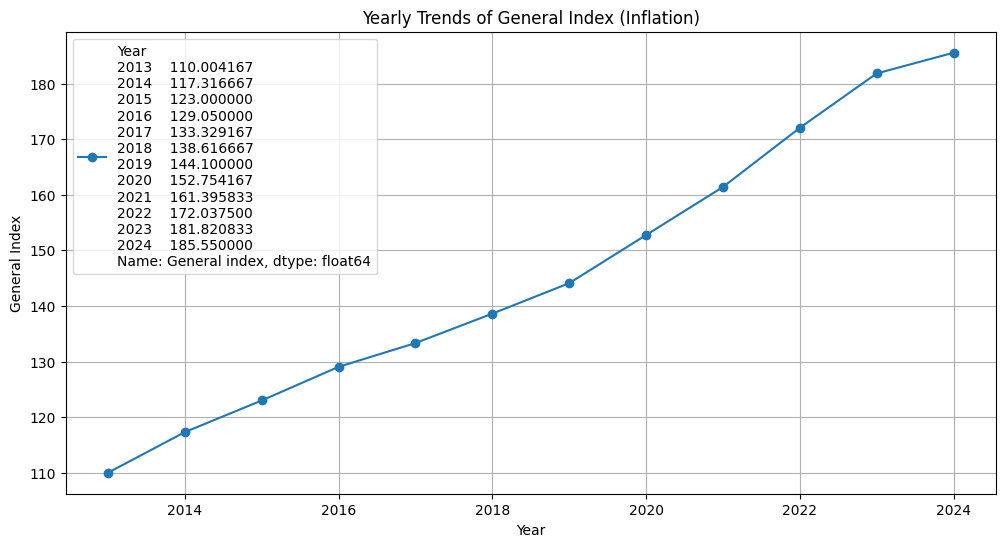

In [12]:
col = df_cleaned.select_dtypes(include=np.number).drop(['Year'],axis=1)
yearly_index = col.groupby(df_cleaned['Year']).mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_index.index, yearly_index['General index'], marker='o',label=yearly_index['General index'])
plt.legend()
plt.xlabel('Year')
plt.ylabel('General Index')
plt.title('Yearly Trends of General Index (Inflation)')
plt.grid(True)
plt.show()

## **Correlation Analysis**

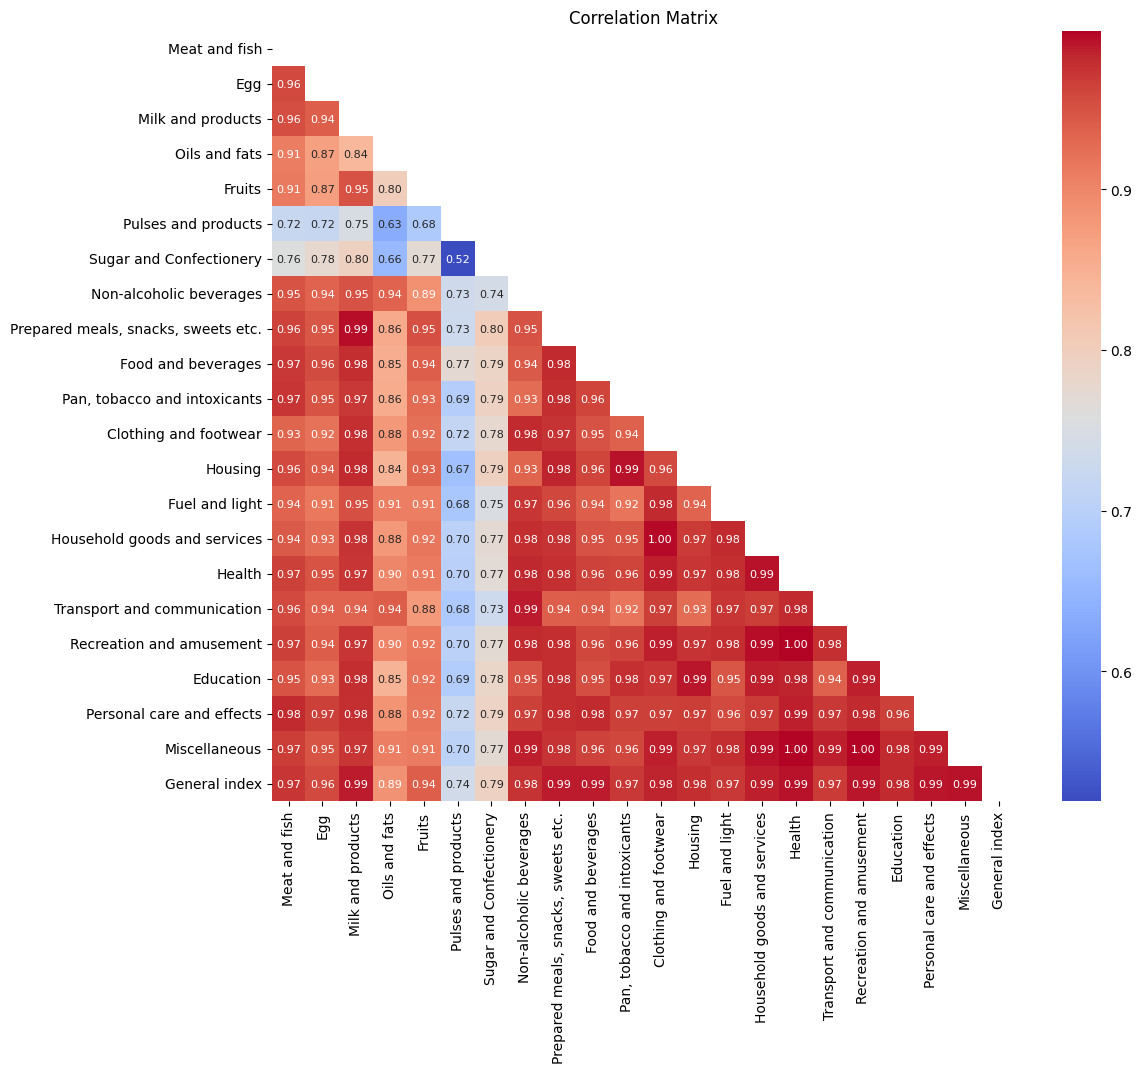

In [13]:
num_col = df_cleaned.select_dtypes(include=np.number)

num_col = num_col.drop(['Year'],axis=1)
correlation = num_col.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, mask=mask,annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

## **Feature Scaling**

In [14]:
# to check if the value stored in Month column and Sector is valied or not
# as this values will be converted to numbers
df_cleaned['Month'] = df_cleaned['Month'].str.strip().str.lower()
df_cleaned['Sector'] = df_cleaned['Sector'].str.strip().str.lower()
valid_months = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}
invalid_months = df_cleaned[~df_cleaned['Month'].isin(valid_months.keys())]
invalid_months

,Sector,Year,Month,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Pulses and products,Sugar and Confectionery,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index


In [15]:
# Encoding the categorical data of the Month and Sector
df_cleaned['Month'] = df_cleaned['Month'].map(valid_months)

# using label encoding to handle categorical data
df_cleaned['Sector'] = LabelEncoder().fit_transform(df_cleaned['Sector'])

df_cleaned.head()

,Sector,Year,Month,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Pulses and products,Sugar and Confectionery,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,0,2013,1,106.3,108.1,104.9,106.1,103.9,106.1,106.8,...,100.30,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,1,2013,1,109.1,113.0,103.6,103.4,102.3,105.8,105.1,...,100.30,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
3,0,2013,2,108.7,110.2,105.4,106.7,104.0,105.9,105.7,...,100.35,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,1,2013,2,112.9,116.9,104.0,103.5,103.1,104.1,103.8,...,100.40,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
6,0,2013,3,108.8,109.9,105.6,106.2,105.7,105.7,105.0,...,100.40,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0


In [16]:
col = df_cleaned.drop(['Month','Sector','Year'],axis=1)
yearly_index = col.groupby(df_cleaned['Month']).median()
yearly_index.head(12)


,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Pulses and products,Sugar and Confectionery,Non-alcoholic beverages,"Prepared meals, snacks, sweets etc.",Food and beverages,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Month,,,,,,,,,,,,,,,,,,,,,
1,146.90,143.55,141.85,122.60,135.750000,148.10,114.30,130.05,152.50,137.35,...,143.750,133.60,138.05,136.90,120.90,133.10,144.10,130.15,132.05,138.65
2,146.90,140.25,141.60,122.50,137.850000,142.45,113.85,129.95,152.60,137.60,...,144.700,136.05,138.25,137.35,121.40,133.25,144.05,130.90,132.45,138.55
3,143.45,137.10,140.90,120.00,138.950000,137.75,112.15,129.15,150.20,136.05,...,141.825,131.50,135.45,133.65,119.85,130.65,140.25,128.00,130.10,136.35
4,142.45,128.95,139.00,119.75,144.550000,147.35,113.50,128.25,146.90,134.60,...,137.075,131.00,133.05,131.15,119.05,127.95,137.70,125.65,127.85,133.85
5,146.95,132.50,141.55,119.70,145.066667,142.20,111.50,129.60,151.50,137.75,...,143.125,132.20,136.05,135.20,119.95,131.70,142.40,129.65,131.10,137.60
6,149.20,135.05,142.00,119.75,143.250000,144.15,112.20,129.70,151.65,139.20,...,142.675,132.65,136.30,135.50,120.00,132.05,143.15,129.80,131.55,138.35
7,148.95,138.75,142.20,120.20,145.150000,143.80,113.25,130.45,152.10,141.15,...,143.325,131.75,136.90,136.30,120.35,132.80,144.90,129.80,132.35,139.65
8,147.60,136.85,142.35,120.20,146.600000,143.90,114.40,130.70,152.80,141.65,...,144.350,133.10,137.70,137.15,120.75,133.45,146.10,129.80,133.15,140.25
9,145.15,134.70,142.60,120.75,145.400000,145.70,114.75,130.85,153.60,140.45,...,145.125,134.20,138.10,137.85,121.85,134.10,146.40,130.65,133.80,140.10


## **Analyzing Monthly Trends from 2013 to 2024**

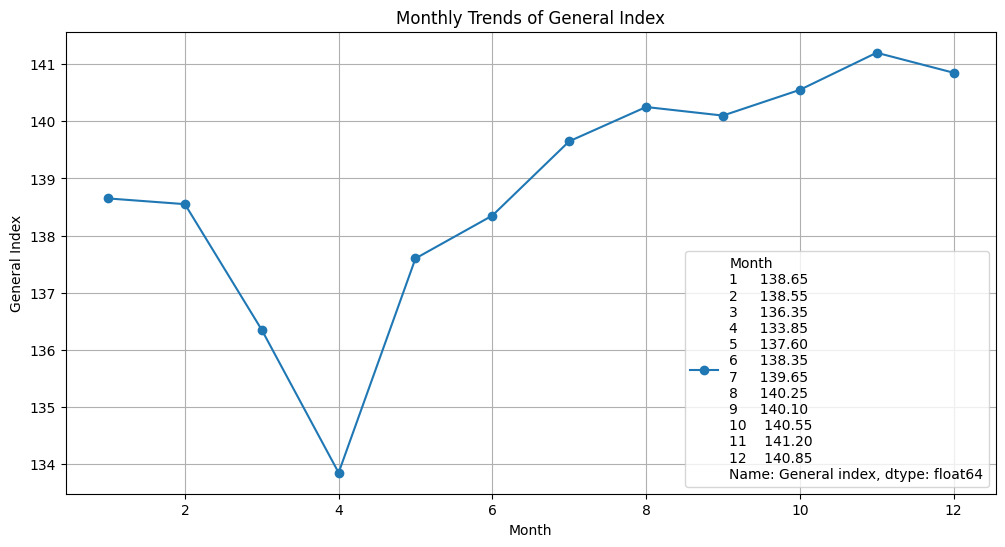

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_index.index, yearly_index['General index'], marker='o',label=yearly_index['General index'])
plt.legend()
plt.xlabel('Month')
plt.ylabel('General Index')
plt.title('Monthly Trends of General Index')
plt.grid(True)
plt.show()

## **Linear Regression model**


In [21]:
x = df_cleaned.drop(['Month','Sector','Year','General index'],axis=1)
y = df_cleaned['General index']

# spliting the data into testing and training sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# training model
model = LinearRegression()
model.fit(x_train,y_train)

# prediction
y_pred = model.predict(x_test)
y_pred

array([152.787253  , 134.7057542 , 138.65455521, 167.40511184,
       119.32127743, 186.83643122, 141.28767015, 133.98816296,
       127.21318835, 132.66376835, 131.23174467, 124.69440832,
       173.72847845, 164.96298236, 171.05018066, 115.4745284 ,
       107.55430612, 140.27157653, 139.75167176, 114.03213039,
       120.66192179, 165.26148657, 184.70508355, 161.78355295,
       167.84435475, 149.80104042, 140.22830278, 106.02215057,
       172.74205896, 151.38769837, 138.76146264, 168.62701817,
       124.55283947, 114.46680061, 139.80675573, 135.62179051,
       143.8591152 , 127.85835776, 133.13534416, 124.27419446,
       113.24309768, 156.3076896 , 178.1726938 , 160.2782976 ,
       115.66081642, 137.97990945, 177.5830754 , 180.31906533,
       113.65783339, 108.49321593, 133.90417538, 188.07963898,
       133.46686213, 123.95327446])

In [22]:
# model evaluation of Linear Regression model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R-squared:",r2)

Mean Squared Error: 0.18662302877608408
R-squared: 0.9996466459436161


## Important features impacting General Index

                                Feature  Coefficient
9                    Food and beverages     0.473517
20                        Miscellaneous     0.380541
11                Clothing and footwear     0.345217
12                              Housing     0.146495
15                               Health     0.142016
10         Pan, tobacco and intoxicants     0.100078
2                     Milk and products     0.059366
13                       Fuel and light     0.051937
6               Sugar and Confectionery     0.016174
3                         Oils and fats     0.010070
5                   Pulses and products    -0.001839
1                                   Egg    -0.005017
4                                Fruits    -0.007181
0                         Meat and fish    -0.017224
7               Non-alcoholic beverages    -0.034164
16          Transport and communication    -0.060349
19            Personal care and effects    -0.075002
17             Recreation and amusement    -0.

(array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 [Text(-0.30000000000000004, 0, '−0.3'),
  Text(-0.20000000000000004, 0, '−0.2'),
  Text(-0.10000000000000003, 0, '−0.1'),
  Text(0.0, 0, '0.0'),
  Text(0.09999999999999998, 0, '0.1'),
  Text(0.19999999999999996, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6, 0, '0.6')])

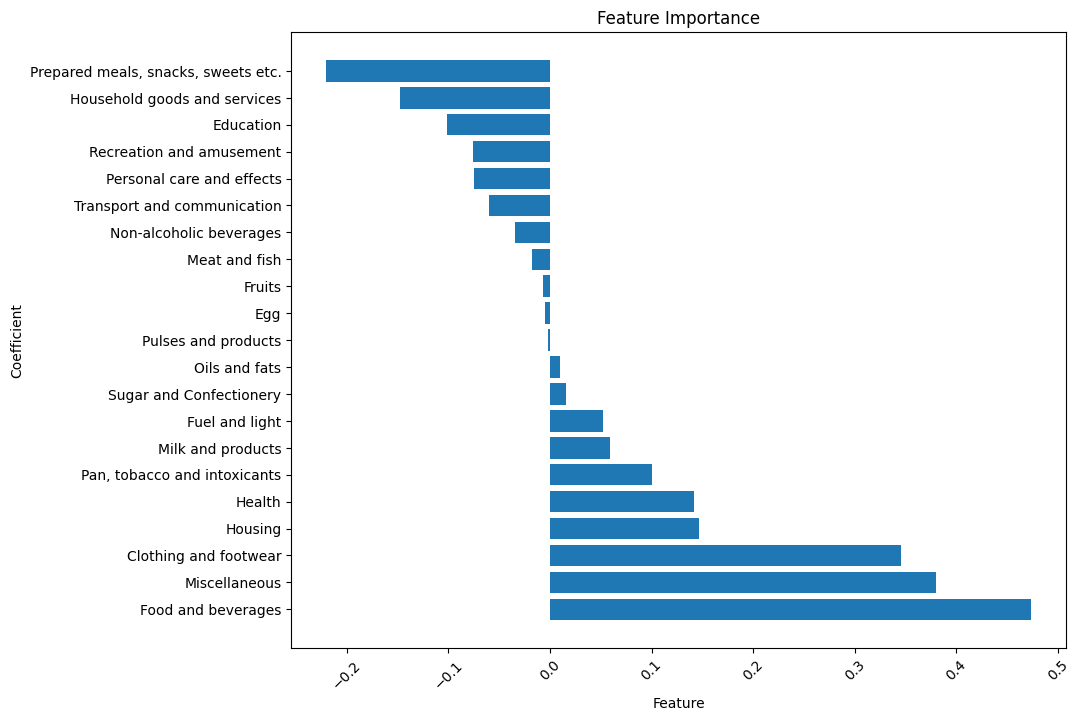

In [30]:
features = x.columns
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.xticks(rotation=45)

## **Decision Tree Model**

In [37]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(x_train, y_train)

y_pred_tree = model_tree.predict(x_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Mean Squared Error (Decision Tree):", mse_tree)
print("R-squared (Decision Tree):", r2_tree)
y_pred_tree

Mean Squared Error (Decision Tree): 1.670192592592595
R-squared (Decision Tree): 0.9968376393234774


array([154.  , 134.1 , 140.5 , 168.7 , 118.4 , 185.8 , 141.  , 132.4 ,
       128.2 , 133.  , 133.4 , 123.8 , 174.1 , 165.5 , 173.6 , 116.  ,
       109.7 , 138.3 , 140.5 , 114.  , 121.1 , 165.5 , 183.4 , 162.3 ,
       167.  , 148.38, 138.3 , 106.  , 173.6 , 150.8 , 140.5 , 171.4 ,
       124.6 , 115.  , 138.6 , 134.1 , 142.2 , 127.7 , 132.4 , 124.1 ,
       115.5 , 156.7 , 177.1 , 159.5 , 118.4 , 138.  , 177.4 , 177.1 ,
       113.3 , 106.  , 134.  , 187.6 , 132.9 , 123.8 ])